# Market Mix Model: Conceptual Toy Example

A marketing mix model is a modeling technique used to determine market attribution, the estimated impact of each marketing channel company uses.

Unlike attribution modeling, another technique used for marketing spend attribution, marketing mix models measure the approximate impact of your marketing channels.
Generally, your output variable will be **sales or conversions**, but it can also be things like **Vend $**. Your input variables typically consist of marketing spend by channel by period (day, week, month, quarter, etc…), but can also include other variables, which we’ll get to later



## The usefulness of marketing mix models
You can tap into the power of a marketing mix model in a number of ways, including:

- To get a better understanding of the relationships between 
your marketing channels and your target metric (i.e. conversions).
- To distinguish high ROI marketing channels from low ones and ultimately better optimize your marketing budget.
- To predict future conversions based on given inputs.
- Each of these insights can offer a ton of value as you scale your business. Let’s dive into what it takes to build one with Python



## Data Read

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv',index_col=0)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Correlation matrix

A correlation matrix is a table that shows the correlation values for each pair relationship. It’s a very fast and efficient way of understanding feature relationships. Here's the code for our matrix.



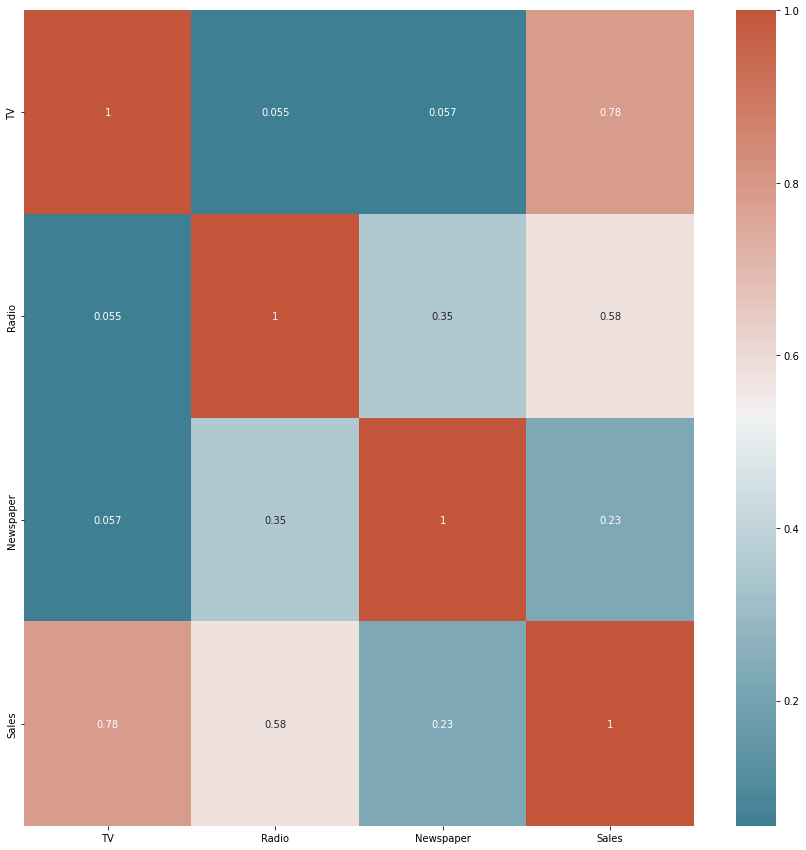

In [5]:
plt.subplots(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = sns.diverging_palette(220, 20, as_cmap=True), )

The correlation matrix above shows that there’s a strong correlation between TV and sales (0.78), a moderate correlation between radio and sales (0.58), and a weak correlation between newspaper and sales (0.23). It’s still too early to conclude anything but this is good to keep in mind as we move on with other EDAs.

## Pairplot

A pair plot is a simple way to visualize the relationships between each variable - it’s similar to a correlation matrix except it shows a graph for each pair-relationship instead of a correlation. Now let’s take a look at the code for our pair plot, as well as the result.

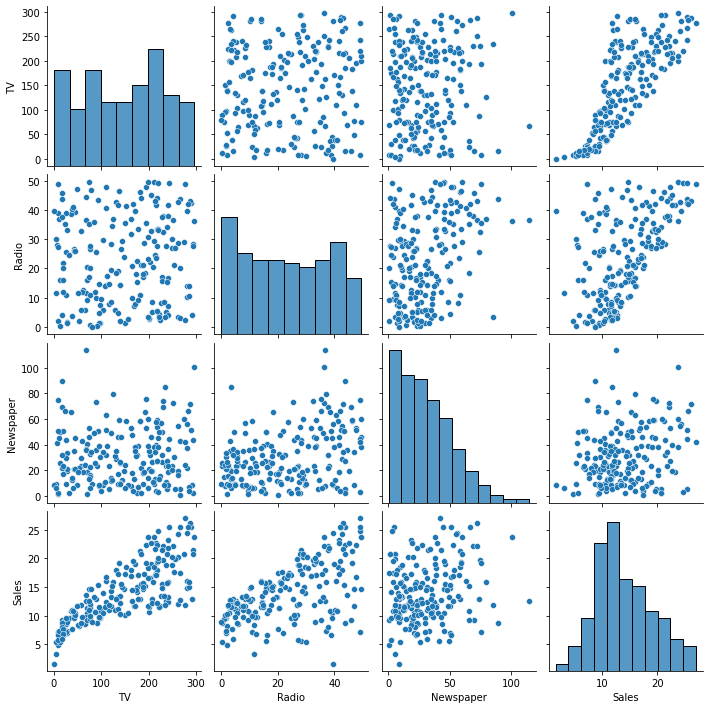

In [6]:
sns.pairplot(df)

We can see some consistency between our pair plot and our original correlation matrix. It looks like there’s a strong positive relationship between TV and sales, less for radio, and even less for newspapers.

## Feature Importance

Feature importance allows you to determine how (you guessed it) “important” each input variable in predicting the output variable.

The code below first creates a random forest model with sales as the target variable and the marketing channels as the feature inputs. Once we create the model, we then calculate the feature importance of each predictor and plot it on a bar chart.

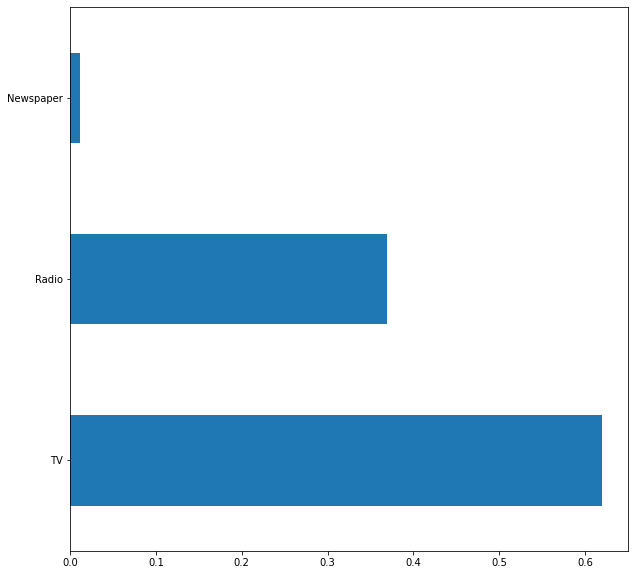

In [7]:
# Setting X and y variables
X = df.loc[:, df.columns != 'Sales']
y = df['Sales']
# Building Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

## Building the Marketing Mix Model

An OLS model is a type of regression model that's most commonly used when building marketing mix models. What makes Python so amazing is that it already has a library that you can use to create an OLS model:

In [10]:
import statsmodels.formula.api as sm
model = sm.ols(formula="Sales~TV+Radio+Newspaper", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        17:52:15   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

## Plot actual vs predicted values
Graph the predicted sales values with the actual sales values to visually see how our model performs. You'd want to do this in a business use case if you’re trying to see how well your model reflects what’s actually happening - in this case, if you’re trying to see how well your model predicts sales based on the amount spent in each marketing channel.

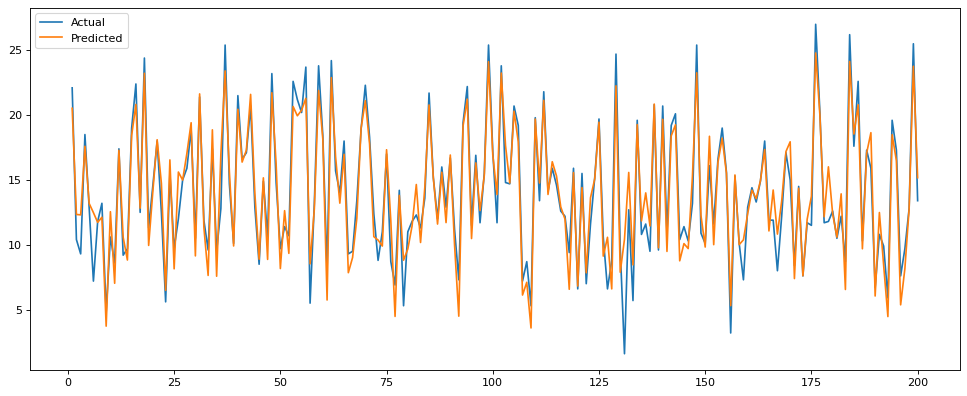

In [13]:
from matplotlib.pyplot import figure

y_pred = model.predict()
labels = df['Sales']
df_temp = pd.DataFrame({'Actual': labels, 'Predicted':y_pred})
df_temp.head()

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
y1 = df_temp['Actual']
y2 = df_temp['Predicted']
plt.plot(y1, label = 'Actual')
plt.plot(y2, label = 'Predicted')
plt.legend()
plt.show()

Not Bad!!

## Interpret a marketing mix model

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        17:56:58   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From  the output from .summary(), we can see a few areas to focus on (you can reference these insights against the OLS regression results below): 

1.   The Adj. R-squared is 0.896. This means approximately 90% of the total variation in the data can be explained by the model
2.   If you look at the column, P>|t|, you can see the p-values for each predictor. The p-values for TV and radio are less than 0.000, but the p-value for newspapers is 0.86, which indicates that newspaper spend has no significant impact on sales. Generally, you want the p-value to be less than 1% or 5%, which are the two standards in practice.
1.   The p-values for TV and radio are less than 0.000, but the p-value for newspapers is 0.86, which indicates that newspaper spend has no significant impact on sales. Generally, you want the p-value to be less than 1% or 5%, which are the two standards in practice.






## Conclusion

This is a toy model that shows the basics of Marketing Mix modeling that helps in building simulation on how much incremental vend dollars can be gotten by spending $1 on one or more of the channels

# Export

In [15]:
!pip install nbconvert

In [16]:
%ls

sample_data/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [19]:
!pwd

/content


In [21]:
%ls

drive/  sample_data/


In [27]:
#from IPython.core.display import Markdown

%%shell

jupyter nbconvert --to markdown '/content/drive/MyDrive/Colab Notebooks/MarketingMix.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/MarketingMix.ipynb to markdown
[NbConvertApp] Support files will be in MarketingMix_files/
[NbConvertApp] Making directory /content/drive/MyDrive/Colab Notebooks/MarketingMix_files
[NbConvertApp] Making directory /content/drive/MyDrive/Colab Notebooks/MarketingMix_files
[NbConvertApp] Making directory /content/drive/MyDrive/Colab Notebooks/MarketingMix_files
[NbConvertApp] Making directory /content/drive/MyDrive/Colab Notebooks/MarketingMix_files
[NbConvertApp] Writing 19081 bytes to /content/drive/MyDrive/Colab Notebooks/MarketingMix.md
